# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [2]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

In [3]:
#helper calls

n_samples = 1500
random_state = 170
#n_samples: If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.
#random_state: Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. 
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0] # 3 punkte
D = np.random.rand(n_samples, 2) # viereck
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0] # varied

In [11]:
A.shape

(1500, 2)

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

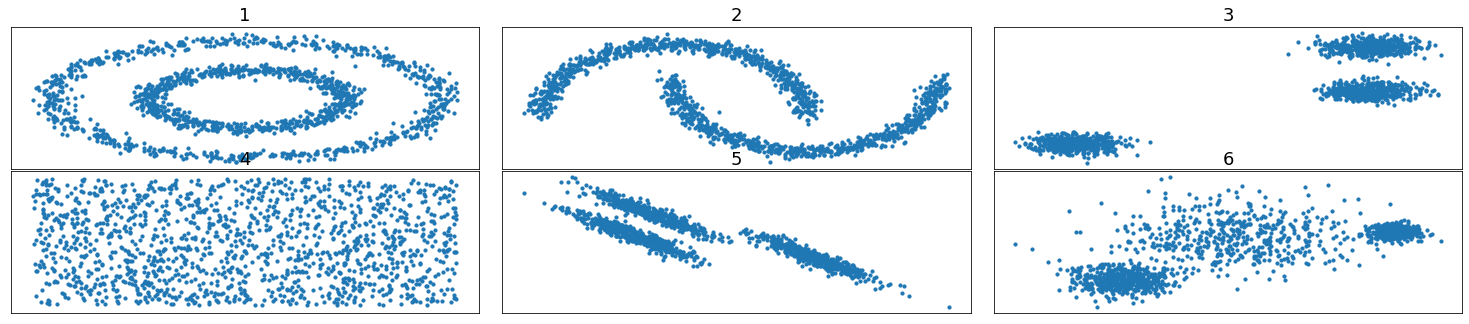

In [10]:
datasets = (A,B,C,D,E,F)
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1

for dataset in datasets:
    X = dataset
    plt.subplot(len(datasets),3, plot_num)
    plt.title(plot_num, size=18)
    # Gibt pro Cluster ne andere Farbe zurück. islice('Daten', StartRückgabe, EndeRückgabe), cycle('Data') Wiederholt die Daten zyklisch 123123123
    #colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']),
    #int(max(y_pred) + 1)))) # y_pred anzahl cluster. oder datenpunkte im cluster
    # add black color for outliers (if any)
    #colors = np.append(colors, ["#000000"])
    #s:scalar or array-like, shape (n, )
    plt.scatter(X[:, 0], X[:, 1], s=10) #Farben einstellung color=colors[y_pred]
    plt.xticks(())# Disable xticks.
    plt.yticks(())
    plot_num += 1
plt.show()

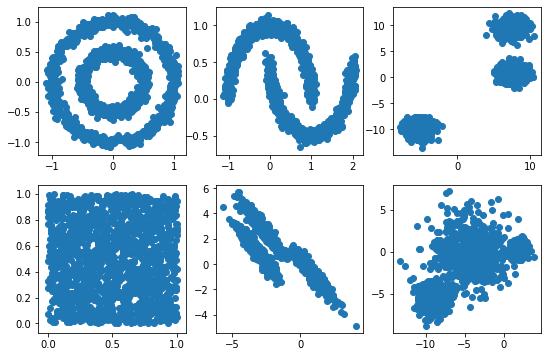

In [4]:
fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1])
axes[0, 1].scatter(B[:,0], B[:,1])
axes[0, 2].scatter(C[:,0], C[:,1])
axes[1, 0].scatter(D[:,0], D[:,1])
axes[1, 1].scatter(E[:,0], E[:,1])
axes[1, 2].scatter(F[:,0], F[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

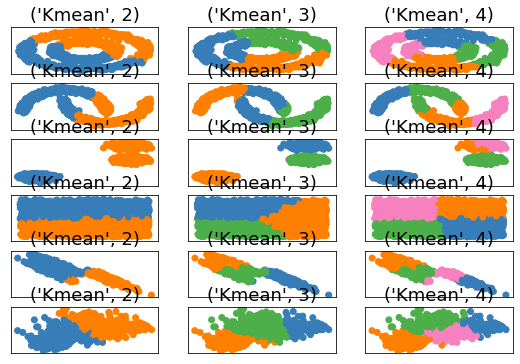

In [6]:
# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9, 6))
datasets = (A,B,C,D,E,F)
plot_num = 1
for dataset in datasets:
    X = dataset
    # normalize dataset for easier parameter selection
    #X= StandardScaler().fit_transform(dataset)

    # ============
    # Create cluster objects
    # ============
    for i in range(2,5):
        two_means = cluster.KMeans(n_clusters=i)
        #clustering_algorithms = (('MiniBatchKMeans', two_means))
        #for name, algorithm in clustering_algorithms:
        y_pred = two_means.fit_predict(dataset)
        plt.subplot(len(datasets), 3, plot_num)
        plt.title(("Kmean",i), size=18)
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
        plt.xticks(())
        plt.yticks(())    
        plot_num += 1    
plt.show()

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

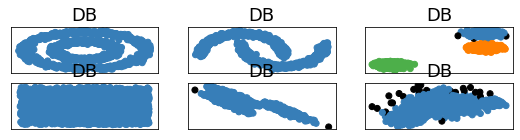

In [9]:
# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9, 6))
datasets = (A,B,C,D,E,F)
plot_num = 1
for dataset in datasets:
    X = dataset
    # normalize dataset for easier parameter selection
    #X= StandardScaler().fit_transform(dataset)

    # ============
    # Create cluster objects
    # ============
    #epsfloat, default=0.5
    #The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. 
    #This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
    dbscan = cluster.DBSCAN(eps=1)
    #clustering_algorithms = (('MiniBatchKMeans', two_means))
    #for name, algorithm in clustering_algorithms:
    y_pred = dbscan.fit_predict(dataset)
    plt.subplot(len(datasets), 3, plot_num)
    plt.title(("DB"), size=18)
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
    plt.xticks(())
    plt.yticks(())    
    plot_num += 1    
plt.show()